# Capstone_Project_Propensity model to identify potential customers_                By Shivam_Namdeo


In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Reading the dataset into DataFrame object df

df_train=pd.read_excel(r'C:\Users\HP\Downloads\propensify_train.xlsx')

In [3]:
# Using pandas library to view the whole set of columns in the dataset

pd.set_option('display.max_columns', None) 

In [4]:
# A look at the number of rows and columns in the dataset

df_train.shape

(8240, 24)

In [5]:
# Taking a lppk at first few rows(5) of the dataset

df_train.head()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded,profit,id
0,34.0,admin.,single,university.degree,no,no,yes,cellular,apr,wed,2.0,999.0,0.0,nonexistent,-1.8,93.075,-47.1,1.498,5099.1,999.0,0.0,no,NaN,1.0
1,31.0,services,single,high.school,no,no,no,cellular,jul,thu,35.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,999.0,0.0,no,NaN,2.0
2,NaN,admin.,single,high.school,no,no,no,telephone,jun,NaN,1.0,999.0,0.0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,999.0,0.0,no,NaN,3.0
3,52.0,admin.,divorced,university.degree,unknown,yes,no,cellular,jul,tue,2.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,999.0,0.0,no,NaN,4.0
4,39.0,blue-collar,single,NaN,unknown,yes,no,cellular,jul,tue,6.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,999.0,0.0,no,NaN,5.0


In [6]:
# Checking the columns in the dataframe 

df_train.columns

Index(['custAge', 'profession', 'marital', 'schooling', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'pmonths', 'pastEmail',
       'responded', 'profit', 'id'],
      dtype='object')

In [7]:
# Checking the datatypes and if any null values are present in the dataset 

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8240 entries, 0 to 8239
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   custAge         6224 non-null   float64
 1   profession      8238 non-null   object 
 2   marital         8238 non-null   object 
 3   schooling       5832 non-null   object 
 4   default         8238 non-null   object 
 5   housing         8238 non-null   object 
 6   loan            8238 non-null   object 
 7   contact         8238 non-null   object 
 8   month           8238 non-null   object 
 9   day_of_week     7451 non-null   object 
 10  campaign        8238 non-null   float64
 11  pdays           8238 non-null   float64
 12  previous        8238 non-null   float64
 13  poutcome        8238 non-null   object 
 14  emp.var.rate    8238 non-null   float64
 15  cons.price.idx  8238 non-null   float64
 16  cons.conf.idx   8238 non-null   float64
 17  euribor3m       8238 non-null   f

In [8]:
# Using the describe method to have aa summary statistics of the numerical values.

df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
custAge,6224.0,39.953728,10.540516,18.00000,32.000,38.000,47.000,94.000
campaign,8238.0,2.531682,2.709773,1.00000,1.000,2.000,3.000,40.000
pdays,8238.0,960.916606,190.695054,0.00000,999.000,999.000,999.000,999.000
previous,8238.0,0.183054,0.514209,0.00000,0.000,0.000,0.000,6.000
emp.var.rate,8238.0,0.056397,1.566550,-3.40000,-1.800,1.100,1.400,1.400
cons.price.idx,8238.0,93.570977,0.578782,92.20100,93.075,93.444,93.994,94.767
cons.conf.idx,8238.0,-40.577907,4.650101,-50.80000,-42.700,-41.800,-36.400,-26.900
euribor3m,8238.0,3.586929,1.742784,0.63400,1.334,4.857,4.961,5.045
nr.employed,8238.0,5165.575965,72.727423,4963.60000,5099.100,5191.000,5228.100,5228.100
pmonths,8238.0,960.687436,191.841012,0.00000,999.000,999.000,999.000,999.000


In [9]:
# Using the describe method to have a summary statistics of the categorical values having datatype as 'Object'.

df_train.describe(include=object)

,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,poutcome,responded
count,8238,8238,5832,8238,8238,8238,8238,8238,7451,8238,8238
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,mon,nonexistent,no
freq,2102,4957,1731,6619,4300,6775,5243,2814,1598,7060,7310


In [10]:
# Our taget column 'responded' whether the potential customers, responded with yes/no, whether Company wish to market to them. in percentage terms.
# This shows thyat the dataset is highly imbalanced as the majority class the 'no' being highly represented 
# will have to use some stragtegies depending on the goal and the dataset requirements 

df_train['responded'].value_counts(normalize=True)*100

no     88.73513
yes    11.26487
Name: responded, dtype: float64

In [11]:
# The column 'id' has no relevance to our modeling outcomes so dropping that.
# Also Column 'Profit' feature also seeem to be irrelevant for the prediction.

df_train.drop(columns=['id','profit'], axis=1,inplace=True)

In [12]:
# Shape of the dataset after dropping the columns 

df_train.shape

(8240, 22)

In [13]:
# Checking the null values if anzy and in what features they are present 

df_train.isna().sum()

custAge           2016
profession           2
marital              2
schooling         2408
default              2
housing              2
loan                 2
contact              2
month                2
day_of_week        789
campaign             2
pdays                2
previous             2
poutcome             2
emp.var.rate         2
cons.price.idx       2
cons.conf.idx        2
euribor3m            2
nr.employed          2
pmonths              2
pastEmail            2
responded            2
dtype: int64

In [14]:
# Drop null values from specific columns in the DataFrame
df_train.dropna(subset=['profession', 'marital', 'default', 'housing',
                        'loan', 'contact', 'month', 'campaign', 'pdays',
                        'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
                        'cons.conf.idx', 'euribor3m', 'nr.employed', 'pmonths',
                        'pastEmail', 'responded'], inplace=True)


In [15]:
#Checking the total null values after dropping the said columns.

df_train.isna().sum()

custAge           2014
profession           0
marital              0
schooling         2406
default              0
housing              0
loan                 0
contact              0
month                0
day_of_week        787
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
pmonths              0
pastEmail            0
responded            0
dtype: int64

In [16]:
# taking counts of the categories inside the profession column. 
df_train['profession'].value_counts()

admin.           2102
blue-collar      1847
technician       1351
services          792
management        583
retired           337
entrepreneur      314
self-employed     279
housemaid         213
unemployed        190
student           159
unknown            71
Name: profession, dtype: int64

In [17]:
# Calculate the mean for each category in the 'profession' column
mean_by_profession = df_train.groupby('profession')['custAge'].mean().round()

mean_by_profession

profession
admin.           38.0
blue-collar      39.0
entrepreneur     42.0
housemaid        46.0
management       42.0
retired          63.0
self-employed    40.0
services         38.0
student          26.0
technician       38.0
unemployed       39.0
unknown          47.0
Name: custAge, dtype: float64

In [18]:
# Impute mean values for null categories in the 'profession' column
df_train['custAge'] = df_train.apply(lambda row: mean_by_profession[row['profession']] if pd.isna(row['custAge']) else row['custAge'], axis=1)


In [19]:
# Checking the null values if any after imputation 

df_train.isna().sum()

custAge              0
profession           0
marital              0
schooling         2406
default              0
housing              0
loan                 0
contact              0
month                0
day_of_week        787
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
pmonths              0
pastEmail            0
responded            0
dtype: int64

In [20]:
df_train['schooling'].value_counts()

university.degree      1731
high.school            1340
basic.9y                863
professional.course     738
basic.4y                586
basic.6y                313
unknown                 260
illiterate                1
Name: schooling, dtype: int64

In [21]:
# Building a cross tab to have summary between the the two columns 

cross_tab = pd.crosstab(df_train['schooling'], df_train['profession'], normalize='index') * 100
cross_tab

profession,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
schooling,,,,,,,,,,,,
basic.4y,2.047782,55.802048,4.436860,10.409556,2.389078,14.675768,1.706485,3.242321,0.341297,0.853242,2.730375,1.365188
basic.6y,8.626198,61.022364,1.597444,4.792332,4.472843,4.153355,0.000000,10.543131,0.638978,3.194888,0.958466,0.000000
basic.9y,7.184241,61.413673,3.012746,2.085747,2.201622,1.738123,4.287370,6.836616,0.926999,6.604867,3.128621,0.579374
high.school,36.268657,8.805970,2.686567,1.492537,3.358209,2.313433,1.567164,27.985075,3.358209,9.179104,2.686567,0.298507
illiterate,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000
professional.course,7.046070,9.756098,3.387534,1.761518,1.897019,4.065041,2.303523,4.065041,0.948509,62.466125,2.032520,0.271003
university.degree,47.198151,0.693241,5.661467,1.270942,16.811092,2.195263,5.430387,1.328712,1.213172,16.233391,1.559792,0.404391
unknown,16.538462,25.000000,3.461538,3.846154,6.923077,6.153846,1.923077,5.384615,9.230769,10.769231,0.384615,10.384615


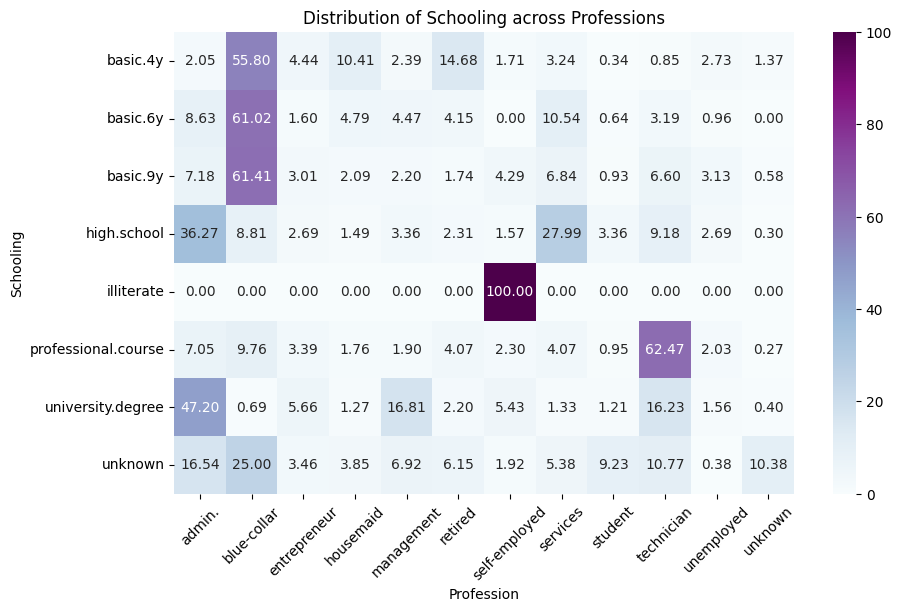

In [22]:
# lets plot the heatmap to find the correlation between the columns 
plt.figure(figsize=(10,6))
sns.heatmap(cross_tab, annot=True, cmap='BuPu', fmt='.2f')
plt.title('Distribution of Schooling across Professions')
plt.xlabel('Profession')
plt.ylabel('Schooling')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [23]:
# Imputation of missing values in education based on profession
mapping = {
    'blue-collar' : 'basic.4y',
    'blue-collar' : 'basic.6y',
    'blue-collar' : 'basic.9y',
    'self-employed': 'illiterate',
    'technician'   : 'professional.course',
    'admin.'        : 'university.degree',
    'services'      : 'high.school',
    'management'    : 'university.degree',
    'retired'       : 'unknown',
    'entrepreneur'  : 'university.degree'
}

In [24]:
# Using fillna method to fill nulll values by mapping to above dictionary 

df_train['schooling'].fillna(df_train['profession'].map(mapping), inplace=True)


In [25]:
# checking the null values sum after imputation looks loke we have some more  missing values. 

df_train['schooling'].isna().sum()

187

In [26]:
df_train.isna().sum()

custAge             0
profession          0
marital             0
schooling         187
default             0
housing             0
loan                0
contact             0
month               0
day_of_week       787
campaign            0
pdays               0
previous            0
poutcome            0
emp.var.rate        0
cons.price.idx      0
cons.conf.idx       0
euribor3m           0
nr.employed         0
pmonths             0
pastEmail           0
responded           0
dtype: int64

In [27]:
df_train['schooling'].value_counts()

university.degree      2591
high.school            1579
basic.9y               1395
professional.course    1124
basic.4y                586
unknown                 368
basic.6y                313
illiterate               95
Name: schooling, dtype: int64

In [28]:
# filling the null values with 'unknown'

df_train['schooling'].fillna('unknown', inplace=True)


In [29]:
df_train.isna().sum()

custAge             0
profession          0
marital             0
schooling           0
default             0
housing             0
loan                0
contact             0
month               0
day_of_week       787
campaign            0
pdays               0
previous            0
poutcome            0
emp.var.rate        0
cons.price.idx      0
cons.conf.idx       0
euribor3m           0
nr.employed         0
pmonths             0
pastEmail           0
responded           0
dtype: int64

In [30]:
# from above it shows there are 787 missing values in day_of_week column

df_train['day_of_week'].value_counts()

mon    1598
thu    1533
tue    1478
wed    1473
fri    1369
Name: day_of_week, dtype: int64

In [31]:
import numpy as np

# Define the list of days
days_list = ['mon', 'tue', 'wed', 'thu', 'fri']

# Replace null values in 'day_of_week' column with random choices
df_train['day_of_week'] = df_train['day_of_week'].fillna(np.random.choice(days_list))


In [32]:
# Now our dataframe looks workable as no null values are present now.

df_train.isna().sum()

custAge           0
profession        0
marital           0
schooling         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
pmonths           0
pastEmail         0
responded         0
dtype: int64

In [33]:
df_train['contact'].value_counts()

cellular     5243
telephone    2995
Name: contact, dtype: int64

In [34]:

df_train.describe(include=object)

,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,poutcome,responded
count,8238,8238,8238,8238,8238,8238,8238,8238,8238,8238,8238
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,wed,nonexistent,no
freq,2102,4957,2591,6619,4300,6775,5243,2814,2260,7060,7310


In [35]:

df_train['poutcome'].value_counts()

nonexistent    7060
failure         895
success         283
Name: poutcome, dtype: int64

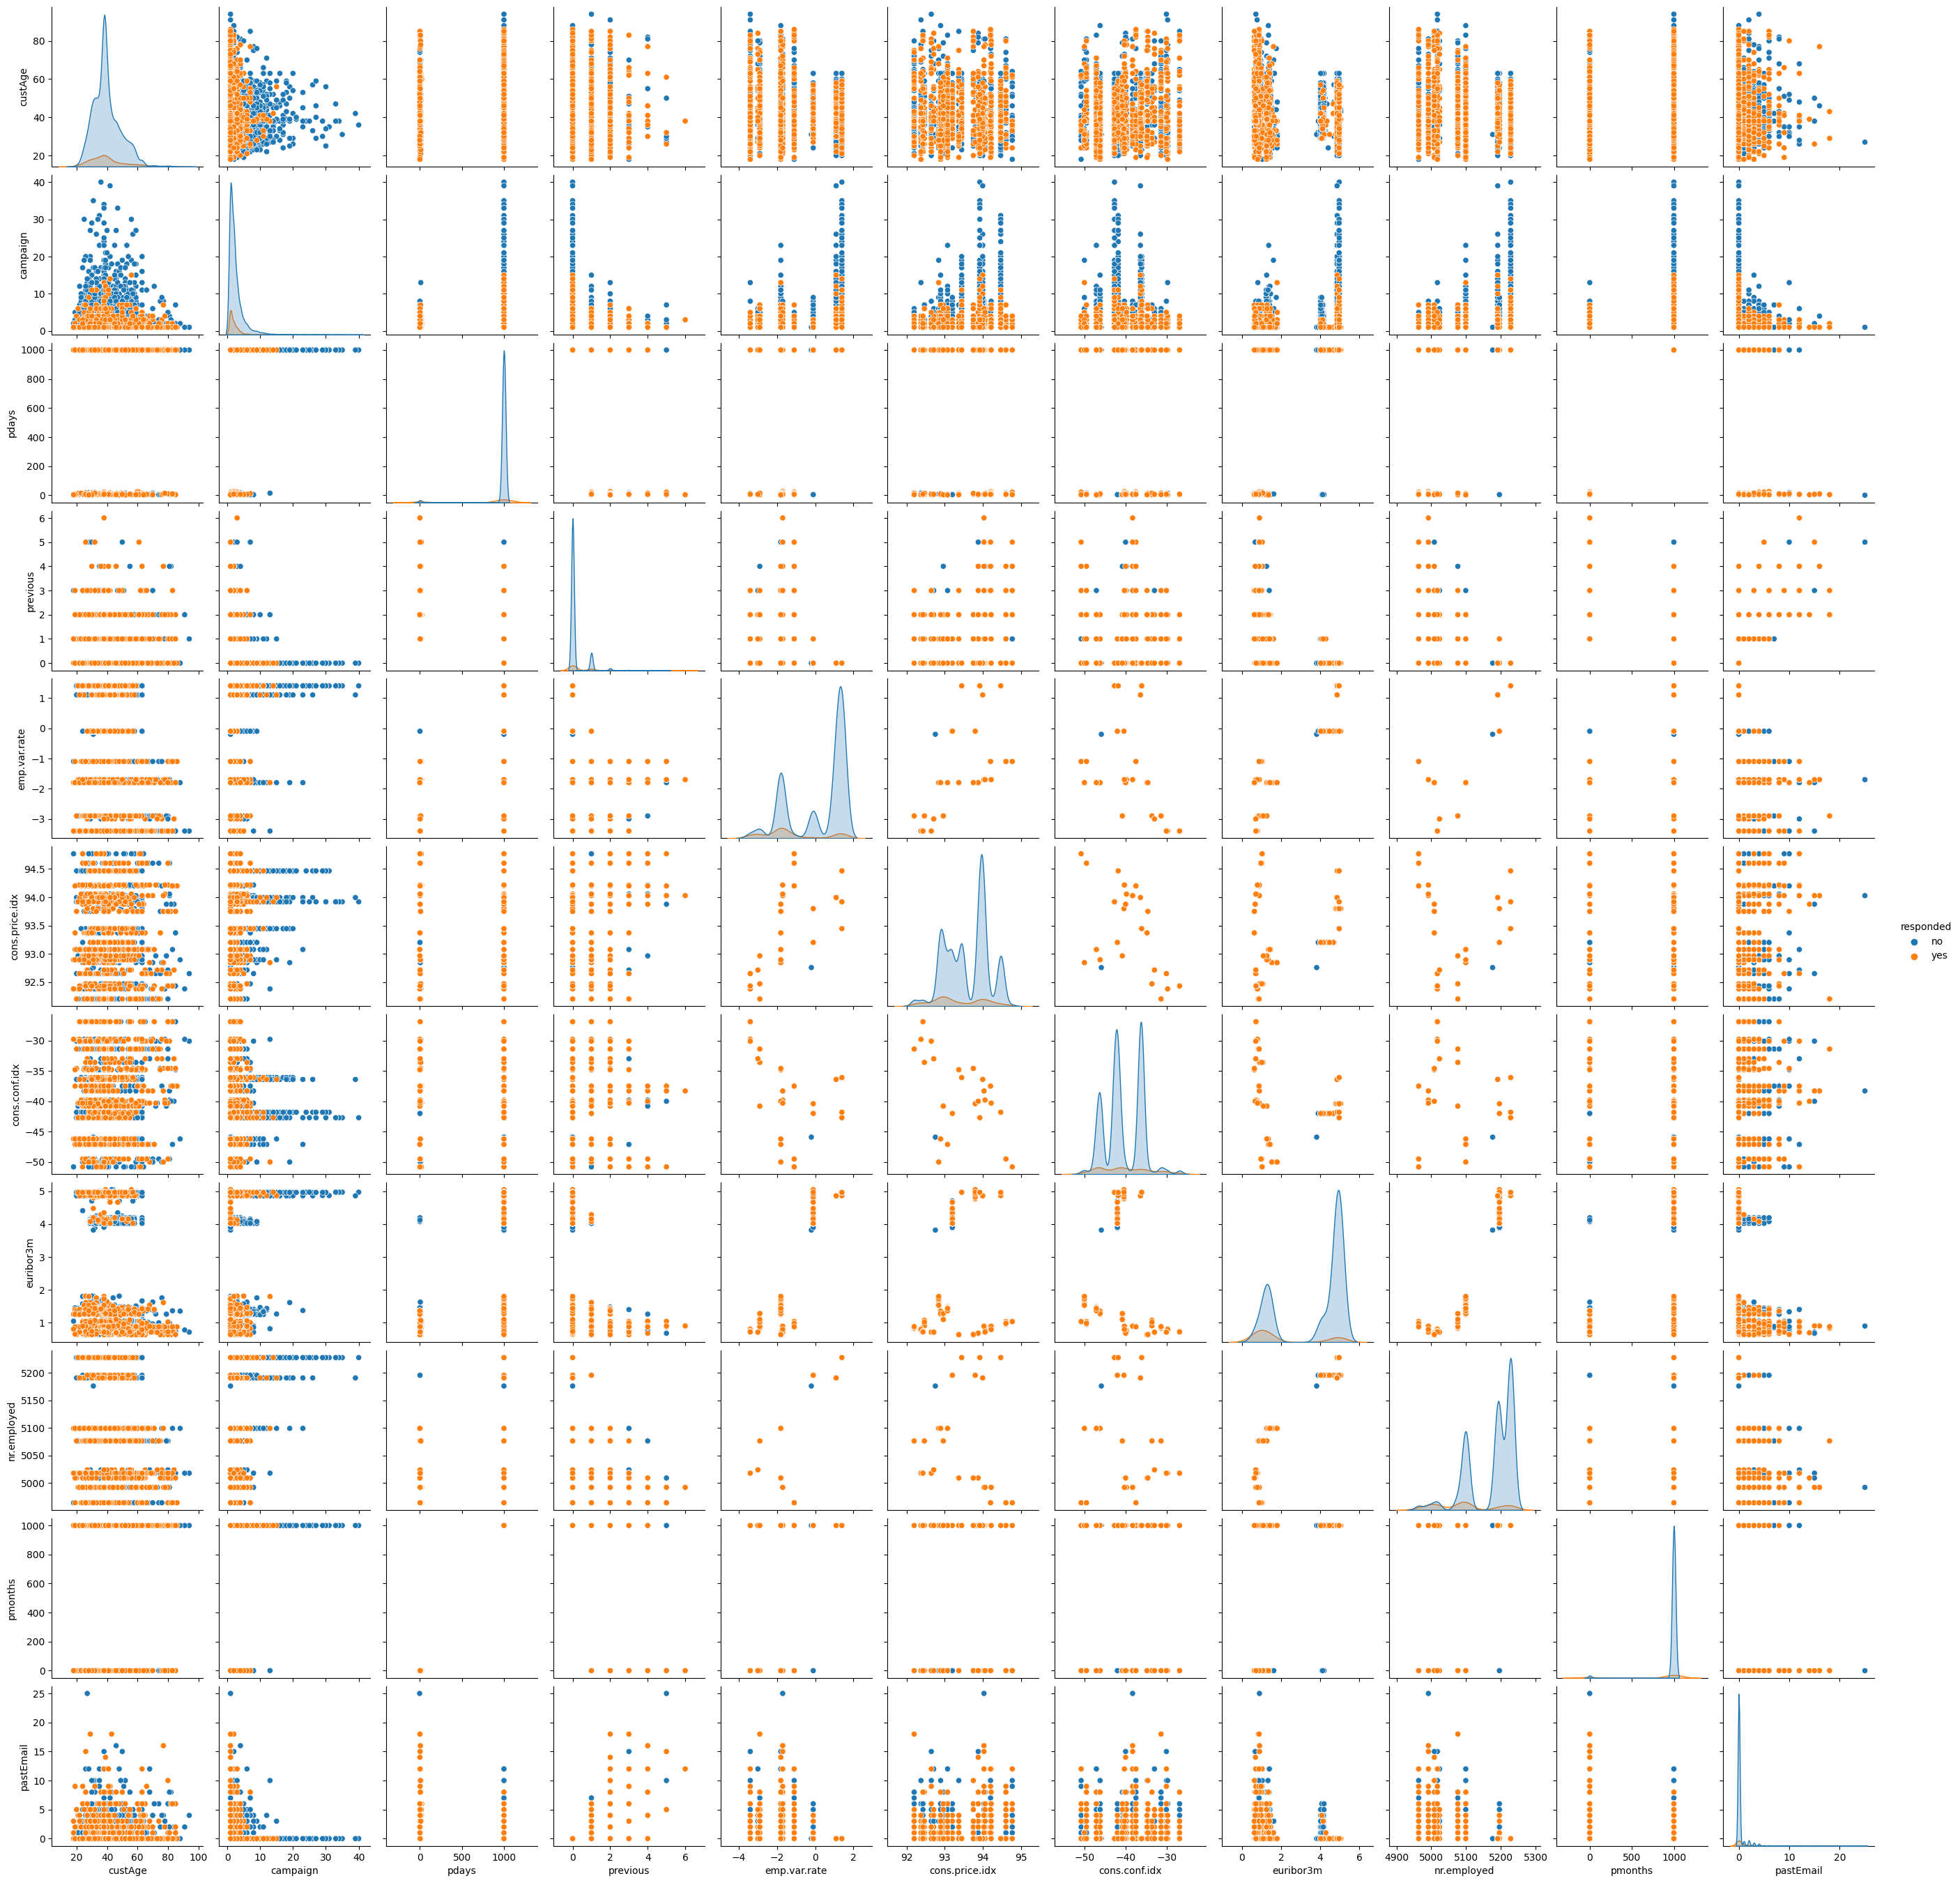

In [36]:
# plotting a pair plot using seaborn to gain insights w.r.t relation among columns and the target feature.
sns.pairplot(df_train, hue='responded')
plt.show()

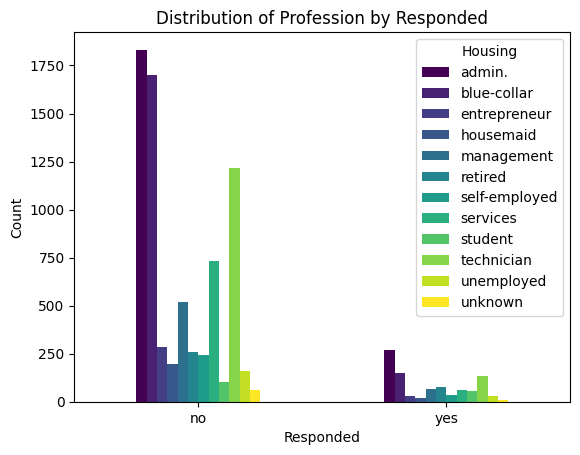

In [37]:
# Plotting the value counts of 'housing' based on 'responded'
df_train.groupby(['responded', 'profession']).size().unstack().plot(kind='bar', stacked=False, colormap='viridis')
plt.title('Distribution of Profession by Responded')
plt.xlabel('Responded')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Housing')
plt.show()

In [38]:
# Combining 'unknown' category with 'single' category
df_train['marital'] = df_train['marital'].replace('unknown', 'single')



In [39]:
df_train['marital'].value_counts()

married     4957
single      2349
divorced     932
Name: marital, dtype: int64

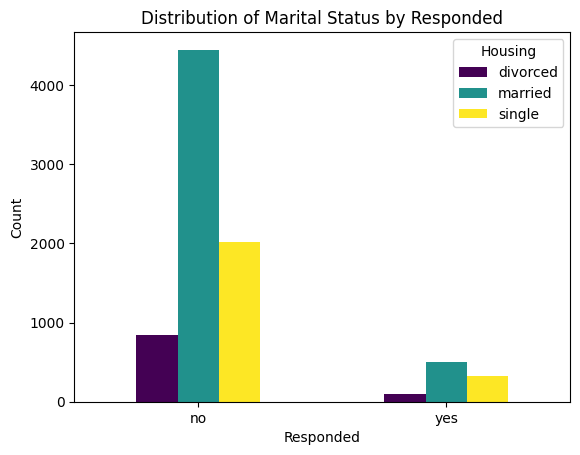

In [40]:
#Plotting the value counts of 'housing' based on 'responded'
df_train.groupby(['responded', 'marital']).size().unstack().plot(kind='bar', stacked=False, colormap='viridis')
plt.title('Distribution of Marital Status by Responded')
plt.xlabel('Responded')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Housing')
plt.show()

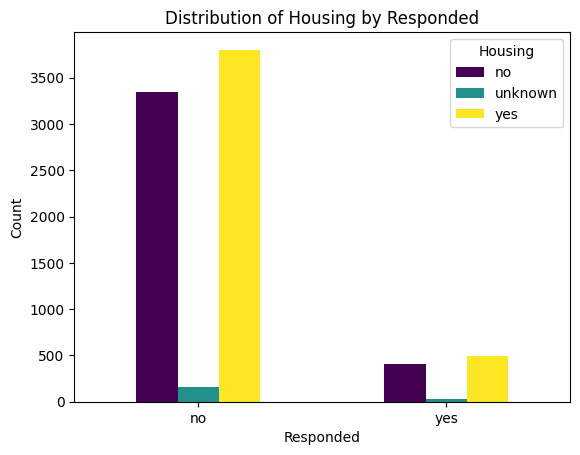

In [41]:
#Plotting the value counts of 'housing' based on 'responded'
df_train.groupby(['responded', 'housing']).size().unstack().plot(kind='bar', stacked=False, colormap='viridis')
plt.title('Distribution of Housing by Responded')
plt.xlabel('Responded')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Housing')
plt.show()

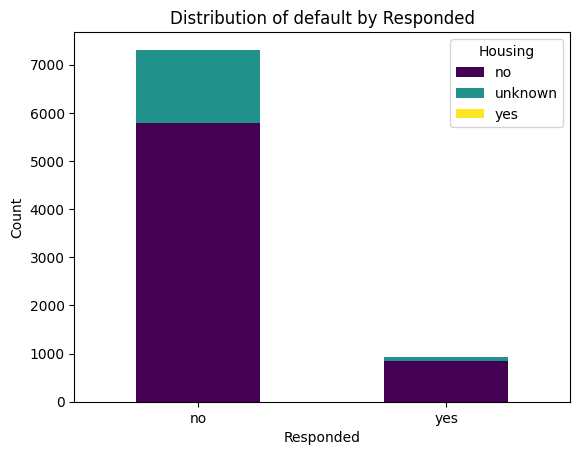

In [42]:
# Plotting the value counts of 'housing' based on 'responded'
df_train.groupby(['responded', 'default']).size().unstack().plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Distribution of default by Responded')
plt.xlabel('Responded')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Housing')
plt.show()

In [43]:
df_train['default'].value_counts()

no         6619
unknown    1618
yes           1
Name: default, dtype: int64

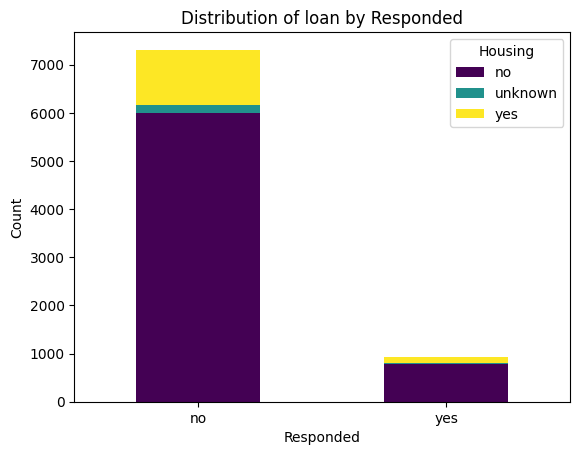

In [44]:
# Plotting the value counts of 'housing' based on 'responded'
df_train.groupby(['responded', 'loan']).size().unstack().plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Distribution of loan by Responded')
plt.xlabel('Responded')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Housing')
plt.show()

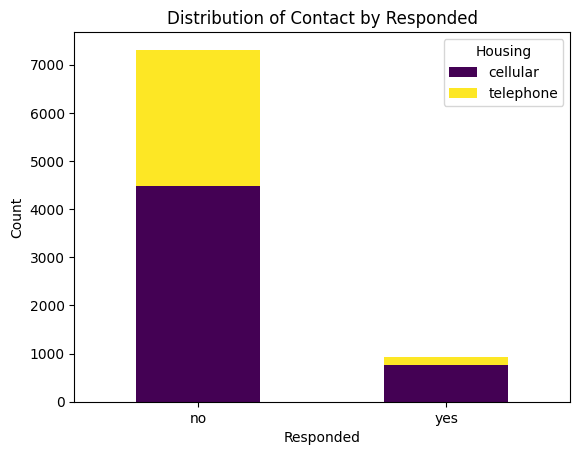

In [45]:
# Plotting the value counts of 'housing' based on 'responded'
df_train.groupby(['responded', 'contact']).size().unstack().plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Distribution of Contact by Responded')
plt.xlabel('Responded')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Housing')
plt.show()

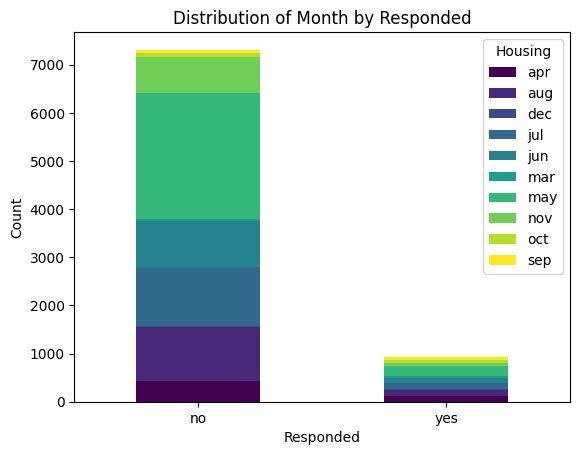

In [46]:
# Plotting the value counts of 'housing' based on 'responded'
df_train.groupby(['responded', 'month']).size().unstack().plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Distribution of Month by Responded')
plt.xlabel('Responded')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Housing')
plt.show()

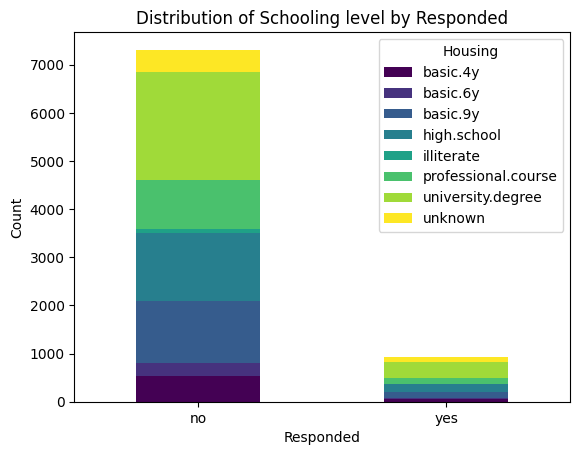

In [47]:
# Plotting the value counts of 'housing' based on 'responded'
df_train.groupby(['responded', 'schooling']).size().unstack().plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Distribution of Schooling level by Responded')
plt.xlabel('Responded')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Housing')
plt.show()

In [48]:
df_train['schooling'].value_counts()

university.degree      2591
high.school            1579
basic.9y               1395
professional.course    1124
basic.4y                586
unknown                 555
basic.6y                313
illiterate               95
Name: schooling, dtype: int64

In [49]:
# Again having a closer look at descriptive summary of continuous values
df_train.describe()

,custAge,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail
count,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000
mean,39.924253,2.531682,960.916606,0.183054,0.056397,93.570977,-40.577907,3.586929,5165.575965,960.687436,0.365501
std,9.547176,2.709773,190.695054,0.514209,1.566550,0.578782,4.650101,1.742784,72.727423,191.841012,1.294101
min,18.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000
25%,34.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000,999.000000,0.000000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000,999.000000,0.000000
75%,45.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,999.000000,0.000000
max,94.000000,40.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,999.000000,25.000000


In [50]:
df_train['previous'].value_counts()

0.0    7060
1.0     947
2.0     165
3.0      43
4.0      14
5.0       8
6.0       1
Name: previous, dtype: int64

In [51]:
# Sample data for 'pdays'
data_pdays = {
    'pdays': [999.0, 6.0, 3.0, 4.0, 9.0, 7.0, 2.0, 12.0, 10.0, 5.0, 13.0, 14.0, 15.0, 11.0, 16.0, 1.0, 0.0, 8.0, 17.0,
              19.0, 25.0, 21.0, 22.0]
}
df_pdays = pd.DataFrame(data_pdays)

# Calculate the Interquartile Range (IQR) for 'pdays'
Q1_pdays = df_pdays['pdays'].quantile(0.25)
Q3_pdays = df_pdays['pdays'].quantile(0.75)
IQR_pdays = Q3_pdays - Q1_pdays

# Determine lower and upper bounds for 'pdays'
lower_bound_pdays = Q1_pdays - 1.5 * IQR_pdays
upper_bound_pdays = Q3_pdays + 1.5 * IQR_pdays

# Identify significant outliers or cutoff value for 'pdays'
significant_outliers_pdays = df_pdays[(df_pdays['pdays'] < lower_bound_pdays) | (df_pdays['pdays'] > upper_bound_pdays)]

print(f"Interquartile Range (IQR) for 'pdays': {IQR_pdays}")
print(f"Lower Bound (pdays): {lower_bound_pdays}, Upper Bound (pdays): {upper_bound_pdays}")
print(f"Significant Outliers (pdays):\n{significant_outliers_pdays}")

Interquartile Range (IQR) for 'pdays': 11.0
Lower Bound (pdays): -11.0, Upper Bound (pdays): 33.0
Significant Outliers (pdays):
   pdays
0  999.0


In [52]:

# Sample data for 'pmonths'
data_pmonths = {
    'pmonths': [0.000000, 0.033333, 0.066667, 0.100000, 0.133333, 0.166667, 0.200000, 0.233333, 0.266667,
                0.300000, 0.333333, 0.366667, 0.400000, 0.433333, 0.466667, 0.500000, 0.533333, 0.566667,
                0.633333, 0.700000, 0.733333, 0.833333, 999.000000]
}
df_pmonths = pd.DataFrame(data_pmonths)

# Calculate the Interquartile Range (IQR)
Q1 = df_pmonths['pmonths'].quantile(0.25)
Q3 = df_pmonths['pmonths'].quantile(0.75)
IQR = Q3 - Q1

# Determine lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify significant outliers or cutoff value
significant_outliers_pmonths = df_pmonths[(df_pmonths['pmonths'] < lower_bound) | (df_pmonths['pmonths'] > upper_bound)]

print(f"Interquartile Range (IQR): {IQR}")
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
print(f"Significant Outliers (pmonths):\n{significant_outliers_pmonths}")


Interquartile Range (IQR): 0.3666665
Lower Bound: -0.36666624999999997, Upper Bound: 1.09999975
Significant Outliers (pmonths):
    pmonths
22    999.0


In [53]:
#pdays
conditions = [
    (df_train['pdays'] == 999),
    (df_train['pdays'] < 10),
    (df_train['pdays'] >= 10),
]

choices = ['first visit', 'less than 10 days','greater than 10 days']

# Create the 'pduration' column based on conditions
df_train['pduration'] = np.select(conditions, choices, default='unknown')

#pmonths
conditions = [
    (df_train['pmonths'] == 999),
    (df_train['pmonths'] <= 0.3),
    (df_train['pmonths'] > 0.3)
]

choices = ['first visit', 'less than 2 months',  'greater than 2 months']

# Create the 'pduration' column based on conditions
df_train['pduration_m'] = np.select(conditions, choices, default='unknown')

In [54]:
df_train['pduration'].value_counts()

first visit             7922
less than 10 days        264
greater than 10 days      52
Name: pduration, dtype: int64

In [55]:
df_train['pduration_m'].value_counts()

first visit              7922
less than 2 months        264
greater than 2 months      52
Name: pduration_m, dtype: int64

In [56]:
df_train['pmonths'].value_counts().sort_index()

0.000000         3
0.033333         4
0.066667        13
0.100000        86
0.133333        25
0.166667         7
0.200000        90
0.233333        16
0.266667         3
0.300000        17
0.333333         8
0.366667         5
0.400000        12
0.433333         6
0.466667         6
0.500000         5
0.533333         4
0.566667         2
0.633333         1
0.700000         1
0.733333         1
0.833333         1
999.000000    7922
Name: pmonths, dtype: int64

In [57]:
df_train['pdays'].value_counts().sort_index()

0.0         3
1.0         4
2.0        13
3.0        86
4.0        25
5.0         7
6.0        90
7.0        16
8.0         3
9.0        17
10.0        8
11.0        5
12.0       12
13.0        6
14.0        6
15.0        5
16.0        4
17.0        2
19.0        1
21.0        1
22.0        1
25.0        1
999.0    7922
Name: pdays, dtype: int64

In [58]:
# One hot encoding and normalization for appropriate variables 
# Dropping target and unnecessary columns
X = df_train.drop(['responded', 'pdays','pmonths'], axis=1)
y = df_train['responded']

# One-hot encode categorical columns
X_encoded = pd.get_dummies(X, columns=['loan', 'marital', 'schooling', 'default', 'housing', 'day_of_week',
                                       'poutcome', 'pduration','pduration_m','profession','month','contact' ],drop_first=True)

# Continuous columns for normalization
continuous_columns = ['custAge','campaign','previous', 'emp.var.rate','cons.price.idx','cons.conf.idx',
                      'euribor3m','nr.employed','pastEmail'
                       ]

In [59]:
# Extracting the continuous columns from X_encoded
X_continuous = X_encoded[continuous_columns]

# StandardScaler
scaler = StandardScaler()

# Fit and transform 
X_continuous_normalized = scaler.fit_transform(X_continuous)

# Replacing the original continuous columns in X_encoded with the normalized ones
X_encoded[continuous_columns] = X_continuous_normalized

In [60]:
X_encoded.columns

Index(['custAge', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'pastEmail',
       'loan_unknown', 'loan_yes', 'marital_married', 'marital_single',
       'schooling_basic.6y', 'schooling_basic.9y', 'schooling_high.school',
       'schooling_illiterate', 'schooling_professional.course',
       'schooling_university.degree', 'schooling_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_nonexistent', 'poutcome_success',
       'pduration_greater than 10 days', 'pduration_less than 10 days',
       'pduration_m_greater than 2 months', 'pduration_m_less than 2 months',
       'profession_blue-collar', 'profession_entrepreneur',
       'profession_housemaid', 'profession_management', 'profession_retired',
       'profession_self-employed', 'profession_services', 'profession_student',
       'pro

The above code provided for the below best hyperparameters, since the code become computationally very very expensive so tuning the parameter grid so to make it computationally less expensive.

In [61]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.combine import SMOTEENN

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create a Support Vector Machine (SVM) classifier with RBF kernel
svm_classifier = SVC(kernel='rbf', probability=True, random_state=42)

# Ensemble the classifiers using a VotingClassifier
ensemble_classifier = VotingClassifier(estimators=[
    ('rf', rf_classifier),
    ('svm', svm_classifier)
], voting='hard')  # 'hard' for probability voting

# Define the preprocessing steps and classifiers for the pipeline
preprocessing_steps = [('smoteenn', SMOTEENN(random_state=42, sampling_strategy=0.5)), ('ensemble_classifier', ensemble_classifier)]
pipeline = ImbPipeline(preprocessing_steps)

# Define the parameter grid for GridSearchCV
param_grid = {
    'smoteenn__sampling_strategy': [0.5],
    'ensemble_classifier__voting': ['hard'],
    'ensemble_classifier__rf__n_estimators': [50],
    'ensemble_classifier__rf__max_depth': [None, 2],
    'ensemble_classifier__rf__min_samples_split': [2, 3],
}

# Create GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best estimator from GridSearchCV
best_estimator = grid_search.best_estimator_

# Perform model validation using cross-validation
cv_scores = cross_val_score(best_estimator, X_train, y_train, cv=5, scoring='accuracy')

# Display cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate and display the mean and standard deviation of cross-validation scores
print("Mean Accuracy:", np.mean(cv_scores))
print("Standard Deviation of Accuracy:", np.std(cv_scores))

# Make predictions on the test set using the best estimator
y_pred = best_estimator.predict(X_test)

# Evaluate the best estimator's performance on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Set: {accuracy:.2f}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Get the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract values from the confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Display number of true positives, true negatives, false positives, and false negatives
print(f"True Positives: {tp}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")

# Display best hyperparameters from GridSearchCV
print("Best Hyperparameters:")
print(grid_search.best_params_)


Cross-Validation Scores: [0.86570561 0.85887709 0.85508346 0.85887709 0.87556904]
Mean Accuracy: 0.8628224582701062
Standard Deviation of Accuracy: 0.007236187567566829
Accuracy on Test Set: 0.86
Classification Report:
              precision    recall  f1-score   support

          no       0.94      0.90      0.92      1466
         yes       0.40      0.55      0.47       182

    accuracy                           0.86      1648
   macro avg       0.67      0.73      0.69      1648
weighted avg       0.88      0.86      0.87      1648

Confusion Matrix:
[[1316  150]
 [  81  101]]
True Positives: 101
True Negatives: 1316
False Positives: 150
False Negatives: 81
Best Hyperparameters:
{'ensemble_classifier__rf__max_depth': None, 'ensemble_classifier__rf__min_samples_split': 2, 'ensemble_classifier__rf__n_estimators': 50, 'ensemble_classifier__voting': 'hard', 'smoteenn__sampling_strategy': 0.5}


The above modelling provided the expected accuracy greater than 0.85 achieving accuracy of 0.86
the cross- validation scores mean accuracy across 5 folds is 0.86 which is decent. 
As there was a lack of subject expertise regarding the dataset some of the categorical features which could be reduced remains untouched for the purpose of this project.
  
  

